### Brain Atlases

A brain atlas is a labeling of a volume. Each voxel contains a label, instead of a gray value. These labels are numeric. Each number corresponds to a region of interest (ROI).

Why ROIs?
1. Explore the data (see signal in areas of interest plotted for each condition or plotted against other variables of interest)
2. Limit number of statistical tests, controlling for Type I error
3. Limit statistical tests to a region that is functionally defined.

Some of these atlases are also explained here: https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Atlases.

### Comparing Atlases

A full list of nilearn atlases can be found here: http://nilearn.github.io/modules/reference.html#module-nilearn.datasets

### Retrieve the Atlas

Since we're using resting state fMRI data, it makes sense to use an atlas defined using resting state fMRI data.

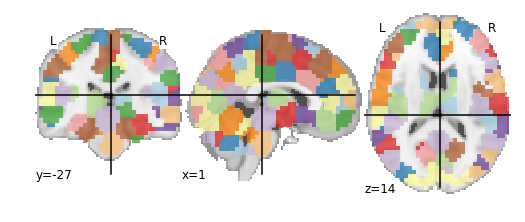

In [7]:
from nilearn import datasets
from nilearn import image as img
from nilearn import plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline

parcel_dir = '../resources/rois/' 
fetch_atlas = datasets.fetch_atlas_craddock_2012(parcel_dir) 

#Notice cc_atlas is 4D, where the 4th dimension contains different types of parcellations
cc_atlas = img.load_img(fetch_atlas['random']) 

#Index 19, contains the 200 ROI parcellation we want to use
cc200 = cc_atlas.slicer[:,:,:,19]

#Let's visualize it
plot.plot_roi(cc200,cmap='Paired')

In [ ]:
from nilearn import datasets
from nilearn import image as img

parcel_dir = '../resources/rois/'
get_parcellations = datasets.fetch_atlas_craddock_2012(parcel_dir)
cc_atlas = img.load_img(get_parcellations['random']) 
craddock_atlas = cc_atlas.slicer[:,:,:,19]

#print('Atlas ROIs are located in nifti image (4D) at: %s' %
#       atlas_filename)

Let's have a look at that atlas

In [ ]:
from nilearn import plotting
import numpy as np

plotting.plot_roi(atlas_filename)
print('Number of parcellations:' + str(np.unique(craddock_atlas.get_data()).shape[0] -1))

Great, let's load an example 4D fmri time-series for one subject

We have prepared some data especially for this tutorial. It is based on an open dataset of children and young adults. More details can be found here

And let's have a look at that 4D resting-state image

In [ ]:
fmri_filenames = data.func[0]
print('fmri timeseries are located in nifti image (4D) at: %s' %
       fmri_filenames)  # 4D data

And let's have a look at that 4D resting-state image

In [ ]:
plotting.plot_stat_map(fmri_filenames)

In [ ]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, 
                           memory='nilearn_cache', verbose=5)